<a href="https://colab.research.google.com/github/MartynaPlomecka/AI4Health/blob/main/Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

In [47]:
beh = pd.read_csv("behaviorals.csv")
foof = pd.read_csv("foof2features.csv")
foof = foof.rename(columns={"C1": "IDs" ,"C2": "Intercept", "C3": "Slope"})
foof.head()

,IDs,Intercept,Slope
0,NDARAA075AMK,0.986272,1.825774
1,NDARAA112DMH,1.486650,1.888544
2,NDARAA117NEJ,1.593155,2.095749
3,NDARAA947ZG5,0.703331,1.724831
4,NDARAA948VFH,0.918020,1.749441


In [48]:
#merge 2 tables together
df = pd.merge( foof, beh, on='IDs', how='inner')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 1929
Columns: 179 entries, IDs to NoDX
dtypes: float64(126), int64(2), object(51)
memory usage: 2.7+ MB


,IDs,Intercept,Slope,Unnamed: 0,Age,Sex,ACE_Score,APQ_P_Total,APQ_SR_Total,ARI_P_Total_Score,ARI_S_Total_Score,ASSQ_Total,AUDIT_Total_Score,Barratt_Total,Barratt_Total_Edu,Barratt_Total_Occ,CBCL_Total,CBCLPre_Total,CIS_SR_Total,CPIC_Content_Total,CPIC_Frequency_Total,CPIC_Intensity_Total,CPIC_Perceived_Threat_Total,CPIC_Resolution_Total,CPIC_Self_Blame_Total,CPIC_Stability_Total,CPIC_Triangulation_Total,DTS_Total,DX_01,DX_01_ByHx,DX_01_Cat,DX_01_Code,DX_01_Confirmed,DX_01_New,DX_01_PRem,DX_01_Past_Doc,DX_01_Presum,DX_01_RC,DX_01_Rem,DX_01_RuleOut,...,DX_08_PRem,DX_08_Past_Doc,DX_08_Presum,DX_08_RC,DX_08_Rem,DX_08_RuleOut,DX_08_Spec,DX_08_Sub,DX_08_Time,DX_09,DX_09_ByHx,DX_09_Cat,DX_09_Code,DX_09_Confirmed,DX_09_New,DX_09_PRem,DX_09_Past_Doc,DX_09_Presum,DX_09_RC,DX_09_Rem,DX_09_RuleOut,DX_09_Spec,DX_09_Sub,DX_09_Time,DX_10,DX_10_ByHx,DX_10_Cat,DX_10_Code,DX_10_Confirmed,DX_10_New,DX_10_PRem,DX_10_Past_Doc,DX_10_Presum,DX_10_RC,DX_10_Rem,DX_10_RuleOut,DX_10_Spec,DX_10_Sub,DX_10_Time,NoDX
0,NDARAA075AMK,0.986272,1.825774,1,6.728040,1,NaN,91.0,123.0,1.0,5.0,3.0,NaN,58.5,21.0,37.5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,No Diagnosis Given,0.0,No Diagnosis Given,No Diagnosis Given,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
1,NDARAA112DMH,1.486650,1.888544,2,5.545744,0,NaN,NaN,NaN,3.0,6.0,7.0,NaN,37.5,15.0,22.5,NaN,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,ADHD-Combined Type,0.0,Neurodevelopmental Disorders,F90.2,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
2,NDARAA117NEJ,1.593155,2.095749,3,7.475929,0,NaN,113.0,95.0,2.0,1.0,2.0,NaN,12.5,7.5,5.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,ADHD-Combined Type,0.0,Neurodevelopmental Disorders,F90.2,NaN,1.0,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
3,NDARAA947ZG5,0.703331,1.724831,7,13.627880,0,NaN,85.0,88.0,8.0,7.0,8.0,0.0,53.0,18.0,35.0,84.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,ADHD-Combined Type,0.0,Neurodevelopmental Disorders,F90.2,1.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
4,NDARAA948VFH,0.918020,1.749441,8,7.982660,1,NaN,91.0,91.0,3.0,7.0,2.0,NaN,53.0,18.0,35.0,32.0,NaN,1.0,8.0,10.0,10.0,12.0,9.0,10.0,8.0,10.0,16.0,ADHD-Combined Type,0.0,Neurodevelopmental Disorders,F90.2,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0


In [49]:
categories = 10
df2 = df.loc[df['DX_01'].isin(df['DX_01'].value_counts()[:categories].index.tolist())]
#print(df2['DX_01'])
print(df2['DX_01'].value_counts())
df2 = df2.rename(columns={"DX_01": "Diagnosis"})


ADHD-Inattentive Type                                       388
ADHD-Combined Type                                          376
No Diagnosis Given                                          203
Autism Spectrum Disorder                                    141
Specific Learning Disorder with Impairment in Reading       134
Generalized Anxiety Disorder                                100
Major Depressive Disorder                                    62
Social Anxiety (Social Phobia)                               61
Other Specified Attention-Deficit/Hyperactivity Disorder     56
ADHD-Hyperactive/Impulsive Type                              44
Name: DX_01, dtype: int64


In [50]:
df2.info() #1565 sbjs

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1565 entries, 0 to 1929
Columns: 179 entries, IDs to NoDX
dtypes: float64(126), int64(2), object(51)
memory usage: 2.1+ MB


In [65]:
categories = 5
df3 = df.loc[df['DX_01'].isin(df['DX_01'].value_counts()[:categories].index.tolist())]
print(df3['DX_01'].value_counts())
df3 = df3.rename(columns={"DX_01": "Diagnosis"})
df3

ADHD-Inattentive Type                                    388
ADHD-Combined Type                                       376
No Diagnosis Given                                       203
Autism Spectrum Disorder                                 141
Specific Learning Disorder with Impairment in Reading    134
Name: DX_01, dtype: int64


,IDs,Intercept,Slope,Unnamed: 0,Age,Sex,ACE_Score,APQ_P_Total,APQ_SR_Total,ARI_P_Total_Score,ARI_S_Total_Score,ASSQ_Total,AUDIT_Total_Score,Barratt_Total,Barratt_Total_Edu,Barratt_Total_Occ,CBCL_Total,CBCLPre_Total,CIS_SR_Total,CPIC_Content_Total,CPIC_Frequency_Total,CPIC_Intensity_Total,CPIC_Perceived_Threat_Total,CPIC_Resolution_Total,CPIC_Self_Blame_Total,CPIC_Stability_Total,CPIC_Triangulation_Total,DTS_Total,Diagnosis,DX_01_ByHx,DX_01_Cat,DX_01_Code,DX_01_Confirmed,DX_01_New,DX_01_PRem,DX_01_Past_Doc,DX_01_Presum,DX_01_RC,DX_01_Rem,DX_01_RuleOut,...,DX_08_PRem,DX_08_Past_Doc,DX_08_Presum,DX_08_RC,DX_08_Rem,DX_08_RuleOut,DX_08_Spec,DX_08_Sub,DX_08_Time,DX_09,DX_09_ByHx,DX_09_Cat,DX_09_Code,DX_09_Confirmed,DX_09_New,DX_09_PRem,DX_09_Past_Doc,DX_09_Presum,DX_09_RC,DX_09_Rem,DX_09_RuleOut,DX_09_Spec,DX_09_Sub,DX_09_Time,DX_10,DX_10_ByHx,DX_10_Cat,DX_10_Code,DX_10_Confirmed,DX_10_New,DX_10_PRem,DX_10_Past_Doc,DX_10_Presum,DX_10_RC,DX_10_Rem,DX_10_RuleOut,DX_10_Spec,DX_10_Sub,DX_10_Time,NoDX
0,NDARAA075AMK,0.986272,1.825774,1,6.728040,1,NaN,91.0,123.0,1.0,5.0,3.0,NaN,58.5,21.0,37.5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,No Diagnosis Given,0.0,No Diagnosis Given,No Diagnosis Given,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
1,NDARAA112DMH,1.486650,1.888544,2,5.545744,0,NaN,NaN,NaN,3.0,6.0,7.0,NaN,37.5,15.0,22.5,NaN,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,ADHD-Combined Type,0.0,Neurodevelopmental Disorders,F90.2,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
2,NDARAA117NEJ,1.593155,2.095749,3,7.475929,0,NaN,113.0,95.0,2.0,1.0,2.0,NaN,12.5,7.5,5.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,ADHD-Combined Type,0.0,Neurodevelopmental Disorders,F90.2,NaN,1.0,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
3,NDARAA947ZG5,0.703331,1.724831,7,13.627880,0,NaN,85.0,88.0,8.0,7.0,8.0,0.0,53.0,18.0,35.0,84.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,ADHD-Combined Type,0.0,Neurodevelopmental Disorders,F90.2,1.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
4,NDARAA948VFH,0.918020,1.749441,8,7.982660,1,NaN,91.0,91.0,3.0,7.0,2.0,NaN,53.0,18.0,35.0,32.0,NaN,1.0,8.0,10.0,10.0,12.0,9.0,10.0,8.0,10.0,16.0,ADHD-Combined Type,0.0,Neurodevelopmental Disorders,F90.2,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,NDARZM865KE8,0.788340,1.573205,3025,10.008441,0,NaN,84.0,109.0,4.0,4.0,0.0,NaN,54.0,16.5,37.5,24.0,NaN,21.0,5.0,7.0,7.0,1.0,6.0,5.0,5.0,5.0,24.0,ADHD-Combined Type,0.0,Neurodevelopmental Disorders,F90.2,1.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
1923,NDARZM903TNL,1.423824,1.381199,3026,9.586356,1,NaN,119.0,117.0,5.0,2.0,1.0,NaN,63.0,18.0,45.0,25.0,NaN,5.0,5.0,6.0,10.0,3.0,10.0,6.0,8.0,8.0,28.0,No Diagnosis Given,0.0,No Diagnosis Given,No Diagnosis Given,0.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


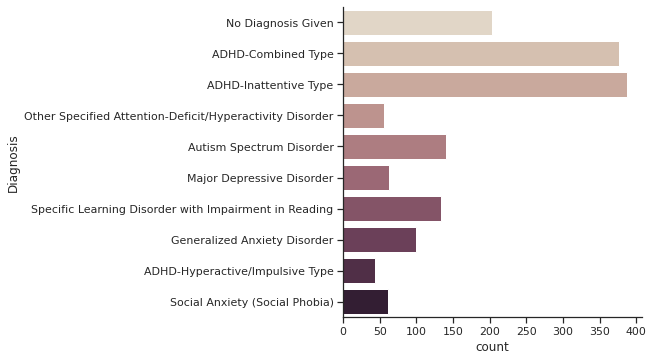

In [70]:
sns.catplot(y="Diagnosis", kind="count", palette="ch:.25", data=df2)


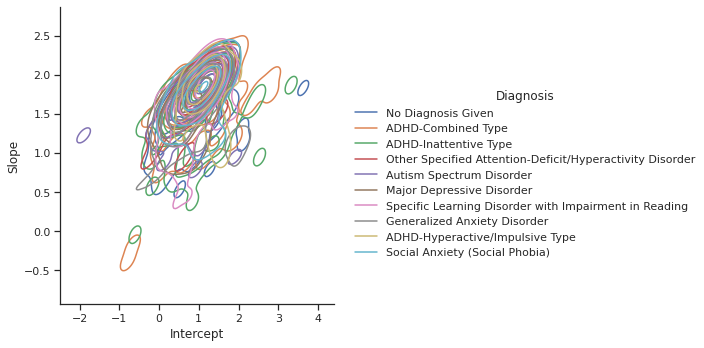

In [67]:
sns.displot(df2, x="Intercept", y="Slope", hue="Diagnosis", kind="kde")


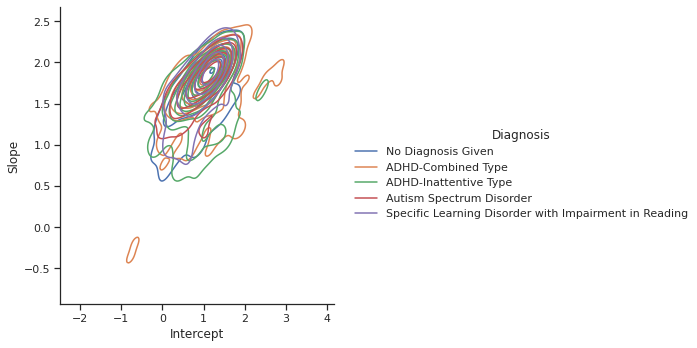

In [75]:
sns.displot(df3, x="Intercept", y="Slope", hue="Diagnosis", kind="kde")


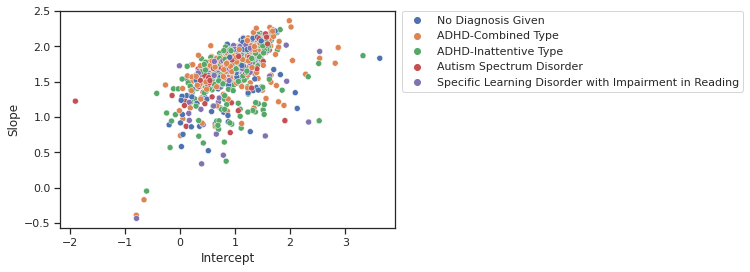

In [77]:
sns.scatterplot(data=df3, x="Intercept", y="Slope", hue="Diagnosis")
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)